### Урок 5 
Проверка статистических гипотез. P-значения. Доверительные интервалы. A/B-тестирование

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

Задача 1
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

$H_0$ - шарики могут иметь средний диаметр 17мм

$H_a$ - шарики имеют другой средний диаметр, больше 17мм
* Правосторонняя область: $\Omega_\alpha = (t_{1 - \alpha}, \infty)$.



[14.53902118 22.61116459 18.1563479  18.30629719 13.78241124 19.99343256
 16.98728141 19.03097377 18.79109509 21.96254301 15.18193063 21.87616576
 17.24983448 17.36732441 16.64104009 17.96656594 17.34273678 15.93146252
 16.27419894 19.88645905 16.86885557 17.26058298 16.87341933 17.31507359
 18.84697473 15.64897018 18.21977116 14.41358002 16.10348753 15.48946599
 19.8194087  17.07353518 16.76506444 16.83130932 16.38641413 15.26296708
 16.95790655 15.1081089  14.62660776 19.64801021 16.46539961 17.51937745
 18.22082698 15.67235217 19.57635679 12.27358957 15.50952694 15.43093573
 14.92065259 16.33722076 19.20638392 20.8770858  17.98488131 18.23921154
 17.78078821 15.90191941 16.26975299 16.40856795 16.98197937 20.78485057
 15.33269316 15.21147243 15.7075259  15.71341562 16.73368397 16.71435856
 12.71413608 15.95267418 16.14320025 16.86404015 18.23406215 15.9109772
 18.11954847 17.21047932 15.99352726 16.62351581 14.80464946 18.46957594
 14.8950013  15.41892959 18.86071152 18.47170578 19.

(array([ 3.,  1.,  7., 23., 24., 17., 10.,  9.,  3.,  3.]),
 array([11.79350531, 12.87527123, 13.95703716, 15.03880309, 16.12056902,
        17.20233495, 18.28410088, 19.36586681, 20.44763274, 21.52939866,
        22.61116459]),
 <a list of 10 Patch objects>)

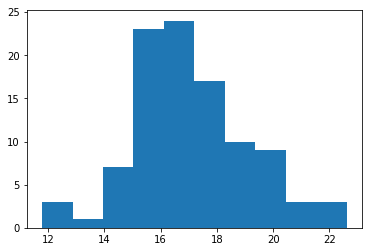

In [15]:
H0 = 17
Ha = 17.5
Pa = 0.025
n = 100
Dx = 4


sigma = np.sqrt(Dx)
samples = np.random.normal(H0, sigma, size=n)
print(samples)
plt.hist(samples)

В нашем случае статистика имеет вид:
$$T(X) = \dfrac{\overline{X} - 17}{2 / 10} = 5 \cdot (\overline{X} - 17).$$
$\alpha = 0.025$.
$$\Omega_\alpha =  (t_{1 - \alpha/2}, \infty).$$
$$\Omega_\alpha =  (2, \infty).$$


In [24]:
mean = samples.mean()
mean

17.088744288885902

In [25]:
Tx = 0
Tx = 5 * (Ha - H0)

stats = stats.norm.ppf(1 - Pa)

print(Tx)
if Tx >= stats:
    print("Верна альтернативная гипотеза: шарики имеют другой средний диаметр, больше 17мм ")
else:
    print("Верна нулевая гипотеза: шарики могут иметь средний диаметр 17мм ") 

2.5
Верна альтернативная гипотеза: шарики имеют другой средний диаметр, больше 17мм 


Задача 2
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания a с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [31]:
sigma = 16
p = 0.95
mean = 80
n = 256
#t = 2.2622

из центральной предельной теоремы мы знаем, что распределение выборочного среднего достаточно похоже на нормальное распределение с параметрами $a = M(X)$ и $\sigma = \sqrt{\dfrac{D(X)}{n}}$.

Математическое ожидание и дисперсию можно теперь оценить, используя выборочное среднее `mean`. Зафиксируем теперь уровень доверия $p = 0.95$. Тогда доверительный интервал:

In [32]:
(mean - 2 * np.sqrt(mean / n), mean + 2 * np.sqrt(mean / n))
# Данный ответ справедлив для распределения Пуассона

(78.8819660112501, 81.1180339887499)

$$T(X) = \dfrac{\overline{X} - a}{\sigma / \sqrt{n}},$$

In [39]:
alpha = 0.05

t = stats.norm.ppf(1 - alpha / 2)
t

1.959963984540054

In [38]:
print("Ответ для нормального распределения:")
dx = (mean - t * sigma / np.sqrt(n), mean + t * sigma / np.sqrt(n))
print("Доверительный интервал от", dx[0], "до",dx[1])

Ответ для нормального распределения:
Доверительный интервал от 78.04003601545995 до 81.95996398454005


In [41]:
# Проверка
(80 - t, 80 + t)

(78.04003601545995, 81.95996398454005)

Задача 3

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?

In [42]:
m_0 = 200
n = 10
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
p = 0.01
mean = samples.mean()
std = samples.std(ddof=1)
mean, std

(198.5, 4.453463071962462)

In [43]:
alpha = 0.01

t = stats.t.ppf(1 - alpha / 2, df=n - 1)
t

3.2498355440153697

In [48]:
dx = (mean - t * std / np.sqrt(n), mean + t * std / np.sqrt(n))
print("Доверительный интервал от", dx[0], "до",dx[1])

Доверительный интервал от 193.92322840036354 до 203.07677159963646


In [49]:
print(f"Ответ: выборочное среднее {mean} в доверительном интервале, следовательно подтверждаем гипотезу, \n что средний вес может составлять 200г")

Ответ: выборочное среднее 198.5 в доверительном интервале, следовательно подтверждаем гипотезу, 
 что средний вес может составлять 200г


In [50]:
T = (mean- m_0) / (std / np.sqrt(n))
T

-1.0651074037450896